In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as req
import time
import json
from pprint import pprint

In [2]:
# Read Lego File and store into Pandas data frame
legos_df = pd.read_csv("Dataset/lego_no_review_df.csv")
legos_df = legos_df[legos_df['year'] >= 2013]
legos_df = legos_df[legos_df['marketplace'] != 'JP']
legos_df = legos_df.reset_index(drop=True)

legos_df.head()

,Unnamed: 0,marketplace,customer_id,review_id,product_id,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_date,year
0,0,US,52187079,R22E1FW4RGFOC5,B00EXJM3P4,923528669,LEGO The Hobbit Dol Guldur Battle 79014,5,0,0,N,Y,LOTR + Lego = nirvana....,16452,2015
1,1,US,38801121,RSKHR5CR97VFJ,B0094J117O,38301932,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5,0,0,N,Y,FUN,16086,2014
2,2,US,17257015,R12HDWC8E4AM74,B00BG5FYY0,702261848,LEGO Hero Factory 44012 EVO Action Figure Playset,4,1,2,N,Y,ok,16086,2014
3,3,US,14537742,R1JH6KW5DMZW5O,B00A852QIG,377101347,LEGO DUPLO My First Construction Site 10518,5,0,0,N,Y,Five Stars,16452,2015
4,4,US,14508692,R2I2XNCOQVZHYS,B00A8O87DA,912541874,LEGO LEGO Hero Factory BREEZ 44006,5,0,0,N,Y,Wonderful,16086,2014


In [3]:
legos_df = legos_df.filter(['marketplace','product_title','star_rating',],axis=1)
legos_df.head()

,marketplace,product_title,star_rating
0,US,LEGO The Hobbit Dol Guldur Battle 79014,5
1,US,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5
2,US,LEGO Hero Factory 44012 EVO Action Figure Playset,4
3,US,LEGO DUPLO My First Construction Site 10518,5
4,US,LEGO LEGO Hero Factory BREEZ 44006,5


In [4]:
Total_Fivestar_rating = legos_df[legos_df["star_rating"]== 5 ]

Total_Fivestar_rating.head(5)

,marketplace,product_title,star_rating
0,US,LEGO The Hobbit Dol Guldur Battle 79014,5
1,US,LEGO® CITY® Museum Break-in & Police Unit w/ S...,5
3,US,LEGO DUPLO My First Construction Site 10518,5
4,US,LEGO LEGO Hero Factory BREEZ 44006,5
6,US,LEGO DUPLO Deluxe Box of fun 10580 Preschool C...,5


In [5]:
DE_only = Total_Fivestar_rating[Total_Fivestar_rating['marketplace'] =='DE']

DE_only.head(5)

,marketplace,product_title,star_rating
83,DE,LEGO Creator 10220 - Volkswagen T1 Campingbus,5
221,DE,LEGO Technic 8110 - Unimog U400,5
275,DE,LEGO Creator 10220 - Volkswagen T1 Campingbus,5
610,DE,LEGO Technic 8110 - Unimog U400,5
1070,DE,LEGO Technic 8110 - Unimog U400,5


In [6]:
DE_only_products = DE_only.groupby(['product_title'])['product_title'].count()
DE_only_products.head(5)

product_title
LEGO 10193 - Mittelalterlicher Marktplatz                               2
LEGO 21103 zurück in die zukunft – Der Delorean Time Machine           18
LEGO 6863 Super Heroes Batwing Kampf über Gotham City                   5
LEGO 6864 - Super Heroes: Batman - Batmobil und Two-Face Verfolgung     1
LEGO 75055 IMPERIAL STAR DESTROYER                                      2
Name: product_title, dtype: int64

In [7]:
DE_only_products_df = pd.DataFrame({'product_title':DE_only_products.index, 'product_title Count':DE_only_products.values})
DE_only_products_df.head(5)

,product_title,product_title Count
0,LEGO 10193 - Mittelalterlicher Marktplatz,2
1,LEGO 21103 zurück in die zukunft – Der Delorea...,18
2,LEGO 6863 Super Heroes Batwing Kampf über Goth...,5
3,LEGO 6864 - Super Heroes: Batman - Batmobil un...,1
4,LEGO 75055 IMPERIAL STAR DESTROYER,2


In [8]:
DE_only_products_df = DE_only_products_df.sort_values(by='product_title Count',ascending=False)
DE_only_products_df.head(5)

,product_title,product_title Count
53,LEGO Technic 8110 - Unimog U400,121
13,LEGO Creator 10220 - Volkswagen T1 Campingbus,114
49,LEGO Technic 42030 - VOLVO L350F Radlader,64
23,LEGO DUPLO 10505 - Familienhaus,60
12,LEGO City 7499 - Flexible Schienen,54


In [9]:
DE_only_products_df = DE_only_products_df.reset_index(drop=True)
DE_only_products_df.head(5)

,product_title,product_title Count
0,LEGO Technic 8110 - Unimog U400,121
1,LEGO Creator 10220 - Volkswagen T1 Campingbus,114
2,LEGO Technic 42030 - VOLVO L350F Radlader,64
3,LEGO DUPLO 10505 - Familienhaus,60
4,LEGO City 7499 - Flexible Schienen,54


In [10]:
US_only = Total_Fivestar_rating[Total_Fivestar_rating['marketplace'] =='US']
US_only_products = US_only.groupby(['product_title'])['product_title'].count()
US_only_products_df = pd.DataFrame({'product_title':US_only_products.index, 'product_title Count':US_only_products.values})
US_only_products_df = US_only_products_df.sort_values(by='product_title Count',ascending=False)
US_only_products_df = US_only_products_df.reset_index(drop=True)
US_only_products_df.head(5)

,product_title,product_title Count
0,LEGO The DeLorean Time Machine Building Set 21...,1492
1,"LEGO Minecraft, Micro World 21102 (Discontinue...",1336
2,LEGO Ghostbusters Ecto-1 21108,924
3,LEGO Minecraft The Nether 21106,912
4,LEGO Minecraft Micro World The Village 21105 (...,902


C:\Users\nelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Five Top Legos in the US')

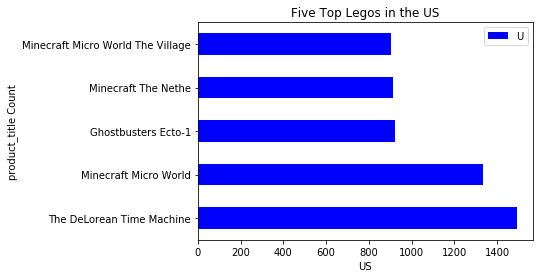

In [11]:
US_only_products_df2 = US_only_products_df.head(5)
US_only_products_df2['Producttitle'] = (['The DeLorean Time Machine','Minecraft Micro World','Ghostbusters Ecto-1','Minecraft The Nethe','Minecraft Micro World The Village'])
US_only_products_df2
US_only_products_df2=US_only_products_df2.plot(kind='barh',x='Producttitle',y='product_title Count',color='blue').legend('US')
plt.xlabel('US')
plt.ylabel('product_title Count')
plt.title('Five Top Legos in the US')

In [12]:
UK_only = Total_Fivestar_rating[Total_Fivestar_rating['marketplace'] =='UK']
UK_only_products = UK_only.groupby(['product_title'])['product_title'].count()
UK_only_products_df = pd.DataFrame({'product_title':UK_only_products.index, 'product_title Count':UK_only_products.values})
UK_only_products_df = UK_only_products_df.sort_values(by='product_title Count',ascending=False)
UK_only_products_df = UK_only_products_df.reset_index(drop=True)
UK_only_products_df.head(5)

,product_title,product_title Count
0,LEGO Star Wars 75056 LEGO Star Wars Advent Cal...,205
1,LEGO City 60063 LEGO City Advent Calendar,176
2,LEGO Friends 41015 Dolphin Cruiser,141
3,LEGO Technic 42002: Hovercraft,133
4,LEGO Friends 3315: Olivia's House,130


C:\Users\nelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Five Top Legos in the UK')

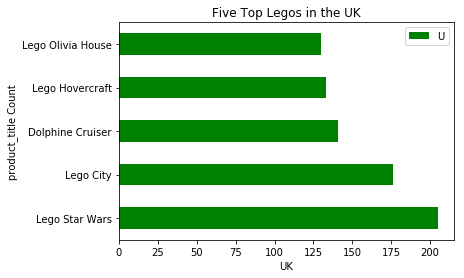

In [13]:
UK_only_products_df2 = UK_only_products_df.head(5)
UK_only_products_df2['Producttitle'] = (['Lego Star Wars','Lego City','Dolphine Cruiser','Lego Hovercraft','Lego Olivia House'])
UK_only_products_df2
UK_only_products_df2=UK_only_products_df2.plot(kind='barh',x='Producttitle',y='product_title Count',color='green').legend('UK')
plt.xlabel('UK')
plt.ylabel('product_title Count')
plt.title('Five Top Legos in the UK')

In [14]:
FR_only = Total_Fivestar_rating[Total_Fivestar_rating['marketplace'] =='FR']
FR_only_products = FR_only.groupby(['product_title'])['product_title'].count()
FR_only_products_df = pd.DataFrame({'product_title':FR_only_products.index, 'product_title Count':FR_only_products.values})
FR_only_products_df = FR_only_products_df.sort_values(by='product_title Count',ascending=False)
FR_only_products_df = FR_only_products_df.reset_index(drop=True)
FR_only_products_df.head(5)

,product_title,product_title Count
0,LEGO Star Wars - 7965 - Jeu de Construction - ...,94
1,LEGO Friends - 41015 - Jeu de Construction - L...,64
2,LEGO Star Wars - 9493 - Jeu de Construction - ...,64
3,LEGO Friends - 3315 - Jeu de Construction - La...,53
4,LEGO Technic - 9398 - Jeu de Construction - Le...,50


C:\Users\nelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Five Top Legos in France')

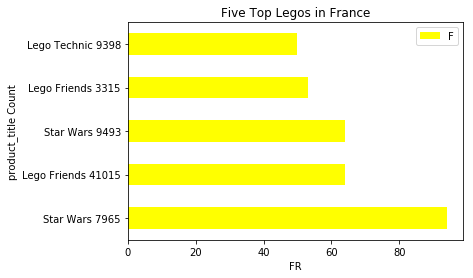

In [15]:
FR_only_products_df2 = FR_only_products_df.head(5)
FR_only_products_df2['Producttitle'] = (['Star Wars 7965','Lego Friends 41015','Star Wars 9493','Lego Friends 3315','Lego Technic 9398'])
FR_only_products_df2
FR_only_products_df2=FR_only_products_df2.plot(kind='barh',x='Producttitle',y='product_title Count',color='yellow').legend('FR')
plt.xlabel('FR')
plt.ylabel('product_title Count')
plt.title('Five Top Legos in France')

In [16]:
DE_only = Total_Fivestar_rating[Total_Fivestar_rating['marketplace'] =='DE']
DE_only_products = DE_only.groupby(['product_title'])['product_title'].count()
DE_only_products_df = pd.DataFrame({'product_title':DE_only_products.index, 'product_title Count':DE_only_products.values})
DE_only_products_df = DE_only_products_df.sort_values(by='product_title Count',ascending=False)
DE_only_products_df = DE_only_products_df.reset_index(drop=True)
DE_only_products_df.head(5)

,product_title,product_title Count
0,LEGO Technic 8110 - Unimog U400,121
1,LEGO Creator 10220 - Volkswagen T1 Campingbus,114
2,LEGO Technic 42030 - VOLVO L350F Radlader,64
3,LEGO DUPLO 10505 - Familienhaus,60
4,LEGO City 7499 - Flexible Schienen,54


C:\Users\nelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5,1,'Five Top Legos in Denmark')

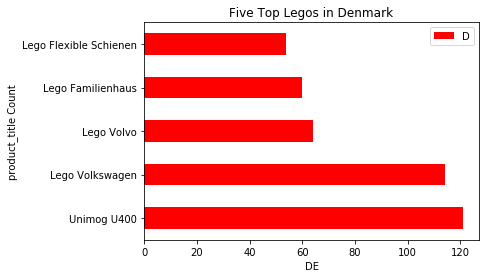

In [17]:
DE_only_products_df2 = DE_only_products_df.head(5)
DE_only_products_df2['Producttitle'] = (['Unimog U400','Lego Volkswagen','Lego Volvo','Lego Familienhaus','Lego Flexible Schienen'])
DE_only_products_df2
DE_only_products_df2=DE_only_products_df2.plot(kind='barh',x='Producttitle',y='product_title Count',color='red').legend('DE')
plt.xlabel('DE')
plt.ylabel('product_title Count')
plt.title('Five Top Legos in Denmark')

In [18]:
# What are the top five Lego for each of the four countries(DE, FR,UK,US) 